In [1]:
#!pip install python-sat

In [2]:
import matplotlib.pyplot as plt
from google.colab import files
from pysat.formula import CNF
from pysat.solvers import Solver
from sympy import symbols, Or, And, Not, simplify_logic
from itertools import combinations

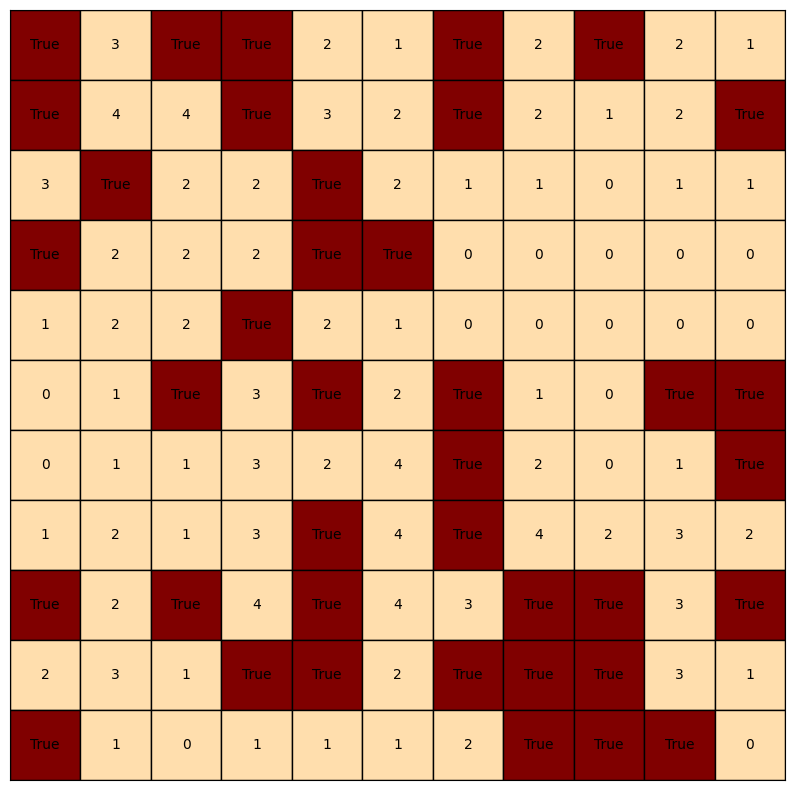

In [3]:
class Cell:
    def __init__(self, value, number, pos_row, pos_col, trap):
        self.value = value      #True: Trap, False: Gem, Digit: number of traps
        self.number = number    #Cell order
        self.row = pos_row
        self.col = pos_col
        self.traps = 0
        self.trap_or_gem_list = []

    def countTrap(self, matrix):
        size = len(matrix)
        if (self.value != True) and (self.value != False):
            if (self.row - 1 < 0): top = self.row
            else: top = self.row - 1

            if (self.row + 1 >= size): bottom = self.row
            else: bottom = self.row + 1

            if (self.col - 1 < 0): left = self.col
            else: left = self.col - 1

            if (self.col + 1 >= size): right = self.col
            else: right = self.col + 1

            for i in range(top, bottom + 1):
                for j in range(left, right + 1):
                    if (matrix[i][j].value == True):
                        self.traps = self.traps + 1

    def getTrapOrGem(self, matrix):
        size = len(matrix)
        if (self.value != True) and (self.value != False):
            if (self.row - 1 < 0): top = self.row
            else: top = self.row - 1

            if (self.row + 1 >= size): bottom = self.row
            else: bottom = self.row + 1

            if (self.col - 1 < 0): left = self.col
            else: left = self.col - 1

            if (self.col + 1 >= size): right = self.col
            else: right = self.col + 1

            for i in range(top, bottom + 1):
                for j in range(left, right + 1):
                    if (matrix[i][j].value == True) or (matrix[i][j].value == False):
                        self.trap_or_gem_list.append(matrix[i][j].number)

class Map():
    def readFile(self, filename):
        with open(filename, 'r') as file:
            lines = file.readlines()
            number = 1
            row_index = 0
            col_index = 0
            for line in lines:
                row = line.strip().split(',')
                row_values = []
                for value in row:
                    if (value.strip() == '_'):
                        val = Cell(True, number, row_index, col_index, True)
                        row_values.append(val)
                        number += 1
                    else:
                        val = Cell(value.strip(), number, row_index, col_index, False)
                        row_values.append(val)
                        number += 1
                    col_index = col_index + 1

                row_index = row_index + 1
                col_index = 0
                self.map_array.append(row_values)

            self.size = len(self.map_array)

    def __init__(self, filename):
        self.size = 0
        self.map_array = []
        self.readFile(filename)
        for row in self.map_array:
            for cell in row:
                cell.getTrapOrGem(self.map_array)

    def printMap(self):
        # Tạo figure và axes
        fig, ax = plt.subplots()

        fig.set_size_inches(10, 10)

        # Vẽ các ô vuông
        for i in range(0, self.size):
                for j in range(0, self.size):
                        if (self.map_array[i][j].value == True):
                            color = "maroon"
                        elif (self.map_array[i][j].value == False):
                            color = "rosybrown"
                        else:
                            color = "navajowhite"
                        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor="black")
                        ax.add_patch(rect)
                        # Ghi giá trị vào ô vuông
                        ax.text(j + 0.5, i + 0.5, (self.map_array[i][j].value), ha="center", va="center", fontsize=10)

        # Loại bỏ các trục số
        ax.set_xticks([])
        ax.set_yticks([])

        # Cài đặt giới hạn trục
        ax.set_xlim(0, self.size)
        ax.set_ylim(self.size, 0)

        # Hiển thị ma trận
        plt.show()

file_path = "/content/drive/MyDrive/Colab Notebooks/map/11x11/11x11.txt"
map = Map(file_path)
#map.readFile(file_path)

map.printMap()
#print(map.map_array[0][0].UnrevealedTiles)

In [4]:
for row in map.map_array:
    for cell in row:
        print(cell.value if cell.value != True else 'T', end=" ")
    print()
print()

for row in map.map_array:
    for cell in row:
        print(str(cell.number) if cell.number > 9 else '0' + str(cell.number), end=" ")
    print()
print()

for row in map.map_array:
    for cell in row:
        print(str(cell.row) + ':' + str(cell.col), end=" ")
    print()

print()
for row in map.map_array:
    for cell in row:
        if (cell.value != True) and (cell.value != False):
            for i in cell.trap_or_gem_list:
                print(i, end=' ')
            print()

T 3 T T 2 1 T 2 T 2 1 
T 4 4 T 3 2 T 2 1 2 T 
3 T 2 2 T 2 1 1 0 1 1 
T 2 2 2 T T 0 0 0 0 0 
1 2 2 T 2 1 0 0 0 0 0 
0 1 T 3 T 2 T 1 0 T T 
0 1 1 3 2 4 T 2 0 1 T 
1 2 1 3 T 4 T 4 2 3 2 
T 2 T 4 T 4 3 T T 3 T 
2 3 1 T T 2 T T T 3 1 
T 1 0 1 1 1 2 T T T 0 

01 02 03 04 05 06 07 08 09 10 11 
12 13 14 15 16 17 18 19 20 21 22 
23 24 25 26 27 28 29 30 31 32 33 
34 35 36 37 38 39 40 41 42 43 44 
45 46 47 48 49 50 51 52 53 54 55 
56 57 58 59 60 61 62 63 64 65 66 
67 68 69 70 71 72 73 74 75 76 77 
78 79 80 81 82 83 84 85 86 87 88 
89 90 91 92 93 94 95 96 97 98 99 
100 101 102 103 104 105 106 107 108 109 110 
111 112 113 114 115 116 117 118 119 120 121 

0:0 0:1 0:2 0:3 0:4 0:5 0:6 0:7 0:8 0:9 0:10 
1:0 1:1 1:2 1:3 1:4 1:5 1:6 1:7 1:8 1:9 1:10 
2:0 2:1 2:2 2:3 2:4 2:5 2:6 2:7 2:8 2:9 2:10 
3:0 3:1 3:2 3:3 3:4 3:5 3:6 3:7 3:8 3:9 3:10 
4:0 4:1 4:2 4:3 4:4 4:5 4:6 4:7 4:8 4:9 4:10 
5:0 5:1 5:2 5:3 5:4 5:5 5:6 5:7 5:8 5:9 5:10 
6:0 6:1 6:2 6:3 6:4 6:5 6:6 6:7 6:8 6:9 6:10 
7:0 7:1 7:2 7:3 7:4 7:5 7:6

In [5]:
def distribute_traps(TrapOrGem, NumOfTrap):
    #This function is used to create a list of list of int
    #The input TrapOrGem is the list of all the cell number that can be trap or gem surrounding one number tile
    #NumOfTrap is the original value on that number tile
    #The total number of list is the combination (Tổ hợp chập) of NumOfTrap out of len(TrapOrGem)

    result = []

    # Generate all combinations of traps
    for combo in combinations(range(len(TrapOrGem)), NumOfTrap):
        distributed = []
        for i in range(len(TrapOrGem)):
            if i in combo:
                distributed.append(TrapOrGem[i])  # Add trap (positive value)
            else:
                distributed.append(-TrapOrGem[i])   # Add gem (negative value)
        result.append(distributed)

    return result

def simplify_clause(all_trap_or_gem):
    #The input all_trap_or_gem is all possibility of trap or gem surrounding one number tile represented by a list of list of int
    #Before simplification, between list has the relation of Or
    #between int within a list has the relation of And
    #After simplification, between list has the relation of And
    #between int within a list has the relation of Or, which is suitable input for pysat CNF using extend method

    if len(all_trap_or_gem) == 0:
        return all_trap_or_gem
    elif len(all_trap_or_gem) == 1:
        return [[x] for x in all_trap_or_gem[0]]    #Convert to And relation as there is only 1 option

    #Preparation
    variables = ''
    for item in all_trap_or_gem[0]:
        variables += str(item) if item > 0 else str(item * -1)
        variables += ' '

    variables = variables[0:-1]     #variables is like '1 2 3 4'

    var = symbols(variables)        #var is a tuple of variable name

    Or_list = []                   #Between list is Or relation
    for arr in all_trap_or_gem:
        And_list = []                #Between list element is And relation
        for i in range(len(arr)):
            if arr[i] > 0:
                And_list.append(var[i])     #Add trap
            else:
                And_list.append(Not(var[i]))    #Add gem
        Or_list.append(And(*And_list))

    #Simplify
    expr = Or(*Or_list)
    simplified_expr = simplify_logic(expr, form='cnf')  #Form='cnf' ensure the relation ship of clauses after simplify is always And

    #Convert simplified_expr to list of list of int
    clauses = simplified_expr.args
    list_ = []
    for clause in clauses:
        list_.append(list(clause.args))
    for arr in list_:
        for i in range(len(arr)):
            arr[i] = str(arr[i])
            if arr[i][0] == '~':
                arr[i] = '-' + arr[i][1:]
            arr[i] = int(arr[i])
    return list_

def generateCNF(map_array):
    cnf = CNF()

    rows = len(map_array)
    cols = len(map_array[0])

    for i in range(rows):
        for j in range(cols):
            if (map_array[i][j].value != False) and (map_array[i][j].value != True):
                num_of_trap = int(map_array[i][j].value)                        #Number of positive int in trap_or_gem_list
                all_trap_or_gem = distribute_traps(map_array[i][j].trap_or_gem_list, num_of_trap)   #At this step, relation between list element is an And and between 2 list is Or
                if (len(all_trap_or_gem) == 0):
                    continue
                #print(all_trap_or_gem)
                clauses = simplify_clause(all_trap_or_gem)                      #At this step, the logic expression above is simplified, relation between list element is Or and between 2 list is And
                #print(clauses)
                cnf.extend(clauses)

    # Use a dictionary to store unique clauses
    unique_clauses = {}
    for clause in cnf.clauses:
        unique_clauses[tuple(clause)] = clause

    # Reconstruct CNF object from unique clauses
    unique_cnf = CNF(from_clauses=list(unique_clauses.values()))

    return unique_cnf

cnf = generateCNF(map.map_array)                        #cnf in pysat cnf format
cnf_list = [list(clause) for clause in cnf.clauses]     #Convert to list of list of int format

# Print unique CNF object
print(len(cnf.clauses))
print(cnf.clauses[0:15])
print(cnf_list[0:15])

138
[[1], [3], [12], [4], [15], [18, 7], [-18, -7], [18, 9], [7, 9], [-18, -7, -9], [9], [22], [24], [27], [18, 27]]
[[1], [3], [12], [4], [15], [18, 7], [-18, -7], [18, 9], [7, 9], [-18, -7, -9], [9], [22], [24], [27], [18, 27]]


In [6]:
model = None
with Solver(bootstrap_with=cnf) as solver:
    # 1 call the solver for this formula:
    print('formula is', f'{"s" if solver.solve() else "uns"}atisfiable')

    model = solver.get_model()
    # 2 the formula is satisfiable and so has a model:
    print('and the model is:', model)

formula is satisfiable
and the model is: [1, -2, 3, 4, -5, -6, -7, -8, 9, -10, -11, 12, -13, -14, 15, -16, -17, 18, -19, -20, -21, 22, -23, 24, -25, -26, 27, -28, -29, -30, -31, -32, -33, 34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, 48, -49, -50, -51, -52, -53, -54, -55, -56, -57, 58, -59, 60, -61, -62, -63, -64, -65, -66, -67, -68, -69, -70, -71, -72, 73, -74, -75, -76, 77, -78, -79, -80, -81, 82, -83, 84, -85, -86, -87, -88, 89, -90, 91, -92, 93, -94, -95, 96, 97, -98, 99, -100, -101, -102, -103, 104, -105, -106, 107, 108, -109, -110, 111, -112, -113, -114, -115, -116, -117, 118, -119, -120]


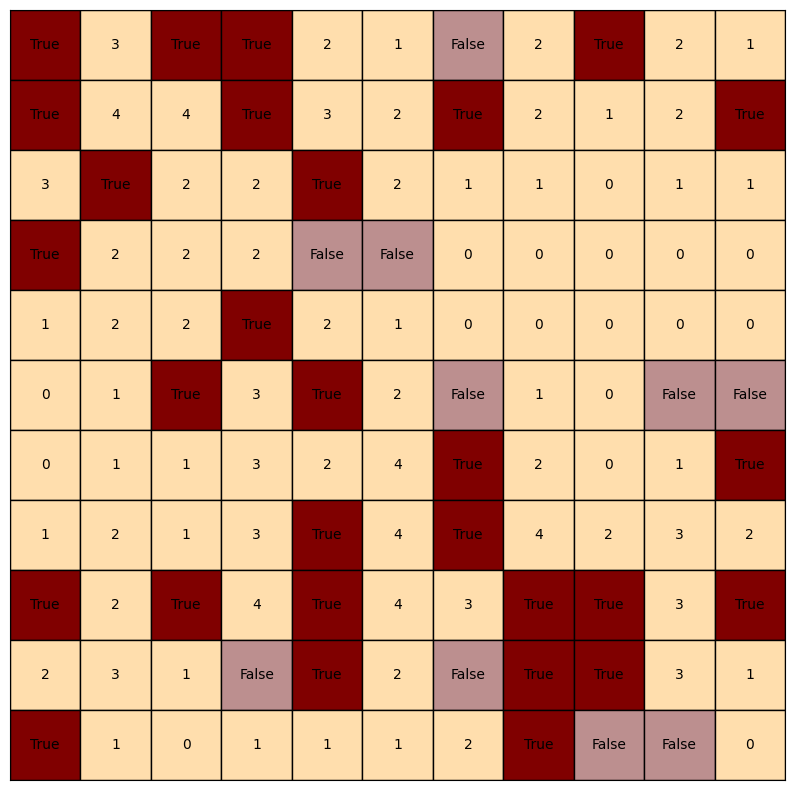

In [7]:
def update_map(map_array, model):
    if model == None:
        return
    rows = len(map_array)
    cols = len(map_array[0])

    for i, number in zip(range(rows * cols), model):
        row = i // cols
        col = i % cols
        if number > 0:                                                          #If it is a trap
            map_array[row][col].value = True
        elif number < 0 and not str(map_array[row][col].value).isdigit():       #If it is not a trap and not a number tile
            map_array[row][col].value = False

update_map(map.map_array, model)
map.printMap()